---
numbering:
  title:
    offset: 1
---

# Addition

In [ ]:
# HIDDEN
from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from matplotlib import patches
import shapely.geometry as sg
import descartes
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# HIDDEN
def show_disjoint_union():
    plt.figure(figsize=(10, 20))
    # create the circles with shapely
    a = sg.Point(1.4,2.5).buffer(1.0)
    b = sg.Point(3.3,2.5).buffer(0.75)


    # use descartes to create the matplotlib patches
    ax = plt.subplot(121)
    ax.add_patch(descartes.PolygonPatch(a, fc='darkblue', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(b, fc='gold', ec='k', alpha=0.6))
    ax.annotate('A', [1.4, 2.5])
    ax.annotate('B', [3.3, 2.5])

    # control display
    plt.title('Mutually Exclusive Events')
    plt.axis('off')
    ax.set_xlim(0, 5); ax.set_ylim(0, 5)
    ax.set_aspect('equal')

    # use descartes to create the matplotlib patches
    ax = plt.subplot(122)
    ax.add_patch(descartes.PolygonPatch(a, fc='blue', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(b, fc='blue', ec='k', alpha=0.8))

    # control display
    plt.title('Disjoint Union')
    plt.axis('off')
    ax.set_xlim(0, 5); ax.set_ylim(0, 5)
    ax.set_aspect('equal')

In [28]:
# HIDDEN
def show_difference():
    plt.figure(figsize=(10, 20))
    # create the circles with shapely
    a = sg.Point(2,2.5).buffer(1.0)
    b = sg.Point(2,2.5).buffer(0.75)

    # compute the 2 parts
    left = a.difference(b)
    middle = a.intersection(b)

    # use descartes to create the matplotlib patches
    ax = plt.subplot(121)
    ax.add_patch(descartes.PolygonPatch(left, fc='darkblue', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(middle, fc='olive', ec='k', alpha=0.8))

    # control display
    plt.title('Nested Events')
    plt.axis('off')
    ax.set_xlim(0, 5); ax.set_ylim(0, 5)
    ax.set_aspect('equal')

    # use descartes to create the matplotlib patches
    ax = plt.subplot(122)
    ax.add_patch(descartes.PolygonPatch(left, fc='blue', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(middle, fc='None', ec='k', alpha=0.8))

    # control display
    plt.title('The Difference')
    plt.axis('off')
    ax.set_xlim(0, 5); ax.set_ylim(0, 5)
    ax.set_aspect('equal')

In [29]:
# HIDDEN
def show_complement():
    plt.figure(figsize=(10, 20))
    # create the square and circle with shapely
    a = sg.box(0, 0, 4.5, 4.5) 
    b = sg.Point(2.25,2.5).buffer(1)

    # compute the 2 parts
    left = a.difference(b)
    middle = a.intersection(b)

    # use descartes to create the matplotlib patches
    ax = plt.subplot(121)
    ax.add_patch(descartes.PolygonPatch(left, fc='None', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(middle, fc='darkblue', ec='k', alpha=0.8))

    # control display
    plt.title('An Event (Square = Omega)')
    plt.axis('off')
    ax.set_xlim(0, 5); ax.set_ylim(0, 5)
    ax.set_aspect('equal')

    # use descartes to create the matplotlib patches
    ax = plt.subplot(122)
    ax.add_patch(descartes.PolygonPatch(left, fc='blue', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(middle, fc='None', ec='k', alpha=0.8))

    # control display
    plt.title('The Complement')
    plt.axis('off')
    ax.set_xlim(0, 5); ax.set_ylim(0, 5)
    ax.set_aspect('equal')

The third axiom is about events that are *mutually exclusive*. Two events $A$ and $B$ are mutually exclusive if at most one of them can happen; in other words, they can't both happen. 

For example, suppose you are selecting one student at random from a class in which 40% of the students are freshmen and 20% are sophomores. Each student is either a freshman or a sophomore or neither; but no student is both a freshman and a sophomore. So if $A$ is the event "the student selected is a freshman" and $B$ is the event "the student selected is a sophomore", then $A$ and $B$ are mutually exclusive.

What's the big deal about mutually exclusive events? To understand this, start by thinking about the event that the selected student is a freshman or a sophomore. In the language of set theory, that's the *union* of the two events "freshman" and "sophomore". It is a great idea to use Venn diagrams to visualize events. In the diagram below, imagine $A$ and $B$ to be two mutually exclusive events shown as blue and gold circles. Because the events are mutually exclusive, the corresponding circles don't overlap. The union is the set of all the points in the two circles.

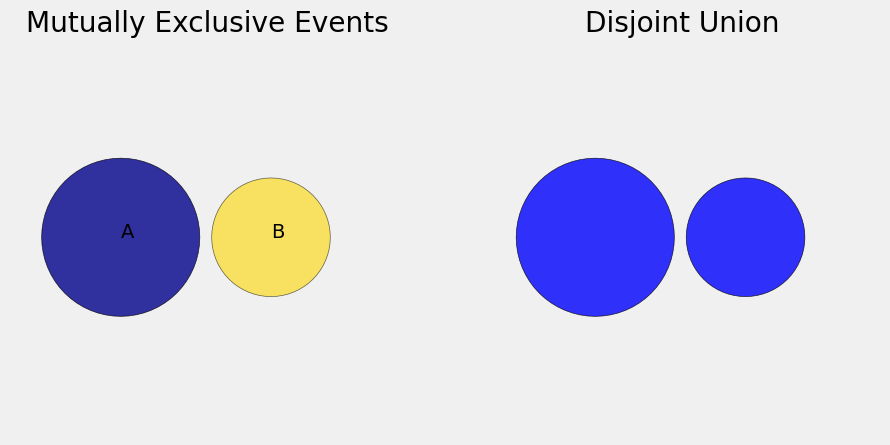

In [30]:
# NO CODE
show_disjoint_union()

What's the chance that the student is a freshman or a sophomore? In the population, 40% are freshmen and 20% are sophomores, so a natural answer is 60%. That's the percent of students who satisfy our criterion of "freshman or sophomore". The simple addition works because the two groups are disjoint.

Kolmogorov used this idea to formulate the third and most important axiom of probability. Formally, $A$ and $B$ are mutually exclusive events if their intersection is empty:

$$
A \cap B = \phi
$$

## The Third Axiom: Addition Rule
In the context of finite outcome spaces, the axiom says:

- If $A$ and $B$ are mutually exclusive events, then $P(A \cup B) = P(A) + P(B)$.

You will show in an exercise that the axiom implies something more general:

- For any fixed $n$, if $A_1, A_2, \ldots, A_n$ are mutually exclusive (that is, if $A_i \cap A_j = \phi$ for all $i \ne j$), then

$$
P\big( \bigcup_{i=1}^n A_i \big) = \sum_{i=1}^n P(A_i)
$$ 

This is sometimes called the axiom of *finite additivity*. Kolmogorov actually specified countable additivity. We'll come to that later.

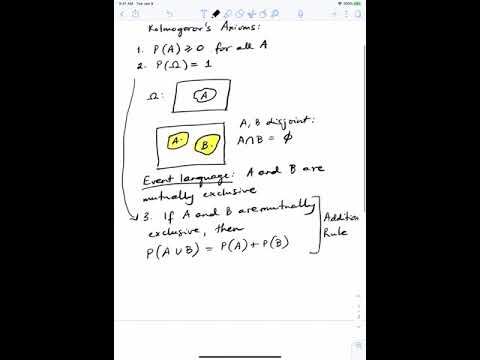

In [ ]:
#| label: vid-axioms
#| echo: false
from IPython.display import YouTubeVideo
YouTubeVideo("KaOriB3Zep8")

```{dropdown} 🎥 See More
![](#vid-axioms)
```

The typical use of the addition rule is when you *list the ways* an event can occur, splitting it up into disjoint pieces whose probabilities you know how to find. This is called *partitioning* the event, a fundamentally important technique to master. 

```{admonition} Quick Check
A box contains two red tickets and one blue ticket. If you draw two tickets at random with replacement, what is the chance that the same color appears on both draws?
```

```{admonition} Answer
:class: dropdown
$P(RR \text{ or } BB) = \frac{2^2}{3^2} + \frac{1^2}{3^2}$
```

```{admonition} Quick Check
At a school, 5% of students are Data Science majors and 12% of students are Economics majors. True or false: We don't need additional assumptions to conclude that 17% of students at the school are majoring in Data Science or Economics.
```

```{admonition} Answer
:class: dropdown
False; we need to assume a student can't major in both, which isn't true in Berkeley.
```

The deceptively simple axiom of additivity has tremendous power, especially when it is extended to account for infinitely many mutually exclusive events. For a start, it can be used to create some handy computational tools.

## Nested Events
Suppose that 50% of the students in a class have Data Science as one of their majors, and 40% are majoring in Data Science as well as Computer Science (CS). If you pick a student at random, what is the chance that the student is majoring in Data Science but not in CS?

The Venn diagram below shows a dark blue circle corresponding to the event $A =$ "Data Science as one of the majors", and a gold circle (not drawn to scale) corresponding $B =$ "majoring in both Data Science and CS". The two events are *nested* because $B$ is a subset of $A$: everyone in $B$ has Data Science as one of their majors.

So $B \subseteq A$, and those who are majoring in Data Science but not CS is the *difference* "$A$ and not $B$":

$$
A \backslash B = A \cap B^c
$$

where $B^c$ is the complement of $B$. The difference is the bright blue ring on the right.

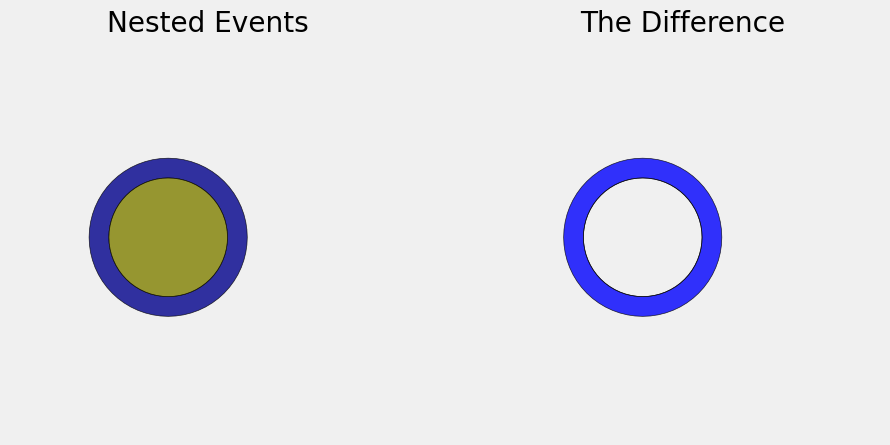

In [32]:
# NO CODE
show_difference()

What's the chance that the student is in the bright blue difference? If you answered, "50% - 40% = 10%", you are right, and it's great that your intuition is saying that probabilities behave just like areas. They do. In fact the calculation follows from the axiom of additivity, which we also motivated by looking at areas.

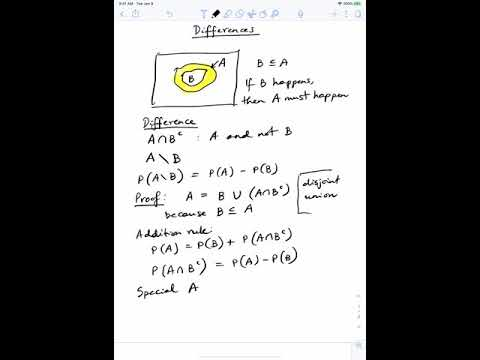

In [9]:
#| label: vid-diff
#| echo: false
from IPython.display import YouTubeVideo
YouTubeVideo("eEoogMY8z60")

```{dropdown} 🎥 See More
![](#vid-diff)
```

## Difference Rule
Suppose $A$ and $B$ are events such that $B \subseteq A$. Then $P(A \backslash B) = P(A) - P(B)$.

**Proof.** Because $B \subseteq A$,

$$
A = B \cup (A \backslash B)
$$

which is a disjoint union. By the axiom of additivity,

$$
P(A) = P(B) + P(A \backslash B)
$$

and so

$$
P(A \backslash B) = P(A) - P(B)
$$

```{admonition} Quick Check
In 2019, 95% of US women owned a cell phone of some kind; 81% owned a smartphone. If you picked a US woman at random in 2019, what is the chance that she owned a cell phone but it wasn't a smartphone?
```

```{admonition} Answer
:class: dropdown
$0.14$
```

```{admonition} Quick Check
A survey organization asks respondents for their age in completed years. Of the respondents, 90% were more than 20 years old, 85% were more than 21 years old, and and 78% were more than 22 years old. What is the chance that a randomly picked respondent is 21 years old?
```

```{admonition} Answer
:class: dropdown
$0.05$
```

### The Complement ###
If an event has chance 40%, what's the chance that it doesn't happen? The "obvious" answer of 60% is a special case of the difference rule.

**Complement Rule**

For any event $B$, $P(B^c) = 1 - P(B)$.

**Proof.** The Venn diagram below shows what to do. Take $A = \Omega$ in the formula for the difference, and remember the second axiom $P(\Omega) = 1$. Alternatively, redo the argument for the difference rule in this special case.

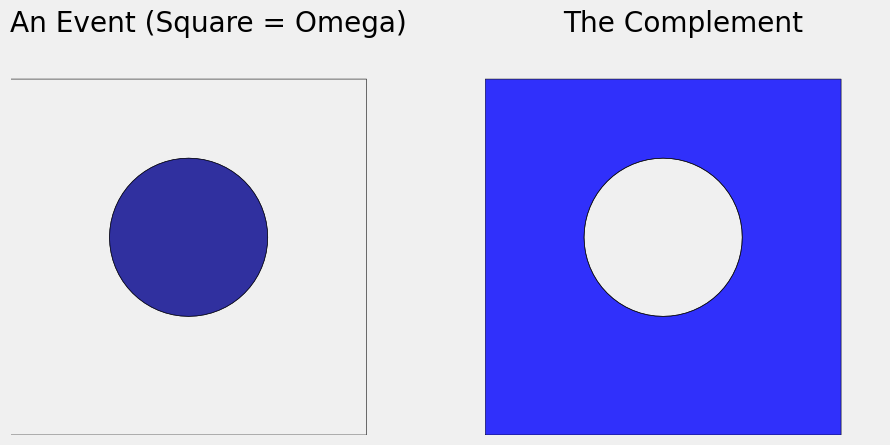

In [34]:
# NO CODE
show_complement()

When you see a minus sign in a calculation of probabilities, as in the Complement Rule above, you will often find that the minus sign is due to a rearrangement of terms in an application of the addition rule.

When should you use the complement to find the probability of an event? The answer seems rather irritating at first: use the complement if the complement is easier to work with than the original event. For example, if the event can happen in numerous different ways, whereas its complement is more straighforward, you should try the complement as in the exercise below.

```{admonition} Quick Check
A die is rolled three times. What is the probability that at least one of the faces that appears has more than one spot?
```

```{admonition} Answer
:class: dropdown
$1 - \frac{1}{216}$
```